In [39]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
df1 = pd.read_csv(r'Coursera_courses2.csv')
df2 = pd.read_csv(r'Coursera_reviews2.csv')
df3 = pd.read_csv(r'edx_courses2.csv')
df4 = pd.read_csv(r'udemy_courses2.csv')

Hare el analisis Dataframe por Dataframe empezando por variables categoricas y luego por numericas, analizando cada Dataframe por separado.

Comenzamos por el primer DF de la plataforma Coursera.

In [41]:
df1.tail(5)

,name,institution,course_url,course_id
618,Accounting Data Analytics with Python,University of Illinois at Urbana-Champaign,https://www.coursera.org/learn/accounting-data...,accounting-data-analytics-python
619,Introduction to Molecular Spectroscopy,University of Manchester,https://www.coursera.org/learn/spectroscopy,spectroscopy
620,Managing as a Coach,"University of California, Davis",https://www.coursera.org/learn/managing-as-a-c...,managing-as-a-coach
621,The fundamentals of hotel distribution,ESSEC Business School,https://www.coursera.org/learn/hotel-distribution,hotel-distribution
622,A Crash Course in Data Science,Johns Hopkins University,https://www.coursera.org/learn/data-science-co...,data-science-course


Tomo la columna 'course_id' para hacer un wordcloud porque me parece la columna mas relevante.

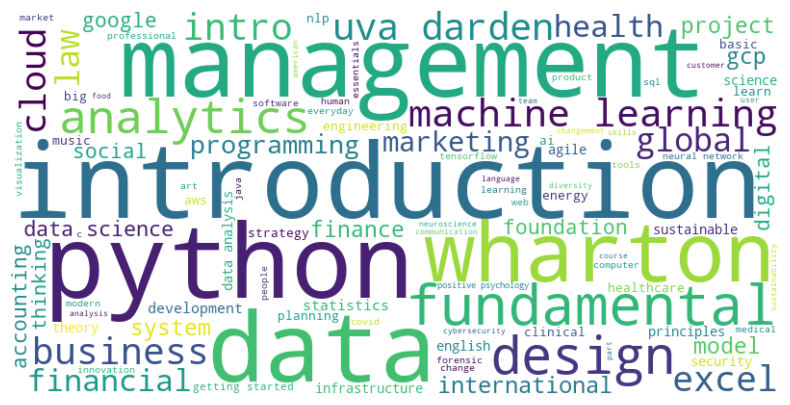

In [42]:
texto = ' '.join(df1['course_id'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [47]:
word_frequencies = wordcloud.words_
df_word_frequencies = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['frequency'])
df_word_frequencies = df_word_frequencies.sort_values(by='frequency', ascending=False)
top_10_1= df_word_frequencies.head(10)

In [92]:
top_10_1.head(5)

,categoria1,frecuencia1
0,introduction,100.0
1,python,96.0
2,management,89.0
3,data,85.0
4,wharton,63.0


In [62]:
top_10_1.reset_index(inplace=True)

In [64]:
top_10_1.rename(columns={top_10_1.columns[0]: 'categoria1', top_10_1.columns[1]: 'frecuencia1'}, inplace=True)

In [86]:
top_10_1['frecuencia1'] = top_10_1['frecuencia1'].round(2)
top_10_1['frecuencia1'] = top_10_1['frecuencia1'] * 100
top_10_1['frecuencia1'] = top_10_1['frecuencia1'].astype(int)

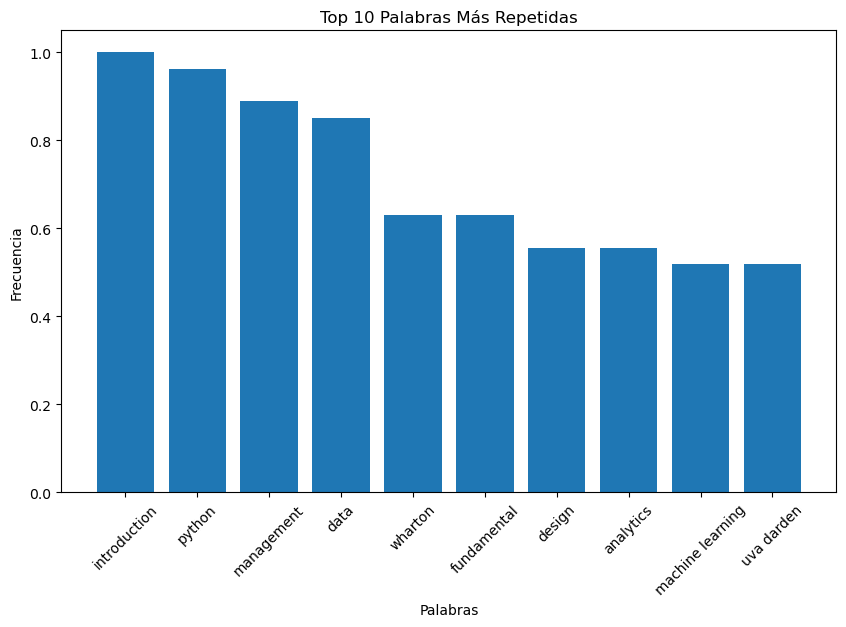

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_1.index, top_10_1['frequency'])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras Más Repetidas')
plt.xticks(rotation=45)
plt.show()

Con el grafico podemos llegar a la conclusion de que hay gran numero de cursos introductorios orientados a la ciencia de datos (principalmente analytics).

Separamos los cursos que son impartidos por instituciones educativas y los que son hechos por empresa.

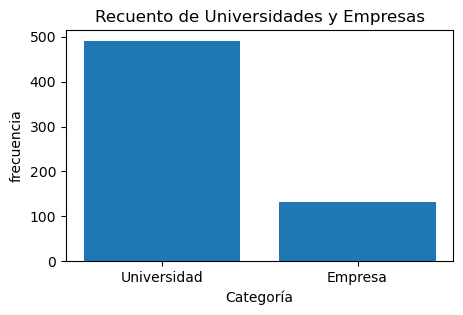

In [7]:
df1['categoria'] = np.where(df1['institution'].str.contains('University|College|Institute|institute|School|school|Universidad'), 'Universidad', 'Empresa')
conteo_categorias = df1['categoria'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(5, 3))
plt.bar(conteo_categorias.index, conteo_categorias.values)
plt.xlabel('Categoría')
plt.ylabel('frecuencia')
plt.title('Recuento de Universidades y Empresas')
plt.show()

Podemos ver que la gran mayoria de los cursos impartidos son hechos por instituciones educativas.

Pasamos al segundo DF de Coursera.

In [8]:
df2.head(5)

,reviews,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...","Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,"Jun 18, 2020",4,google-cbrs-cpi-training


Hacemos un wordcloud para observar las palabras mas repetidas en las reseñas y un analisis de sentimiento para luego graficar.

In [9]:
df2['reviews'] = df2['reviews'].fillna('')

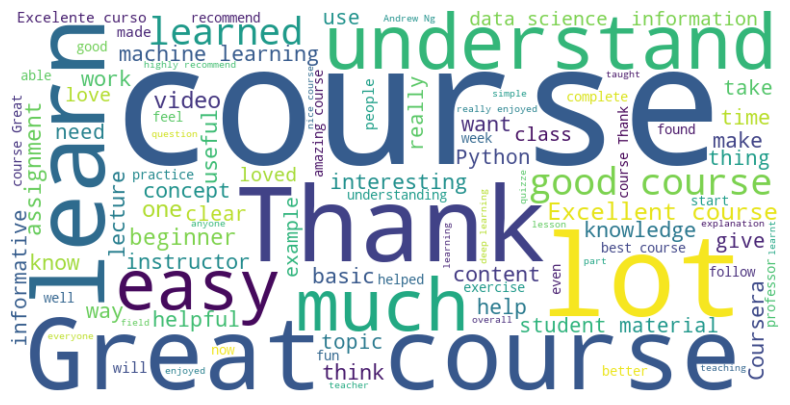

In [10]:
texto = ' '.join(df2['reviews'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [11]:
sia = SentimentIntensityAnalyzer()
df2['sentiment_score'] = df2['reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [12]:
df2.head(3)

,reviews,date_reviews,rating,course_id,sentiment_score
0,"Pretty dry, but I was able to pass with just t...","Feb 12, 2020",4,google-cbrs-cpi-training,0.6440
1,would be a better experience if the video and ...,"Sep 28, 2020",4,google-cbrs-cpi-training,0.4404
2,Information was perfect! The program itself wa...,"Apr 08, 2020",4,google-cbrs-cpi-training,0.6572


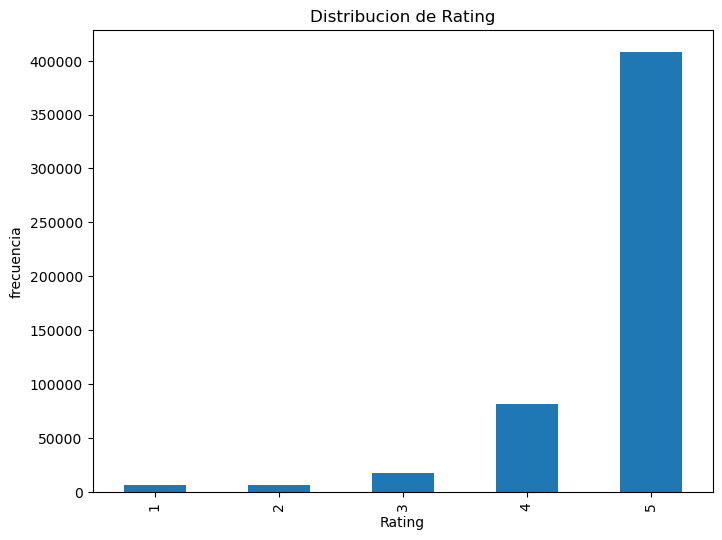

In [13]:
plt.figure(figsize=(8, 6))
df2['rating'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('frecuencia')
plt.title('Distribucion de Rating')
plt.show()

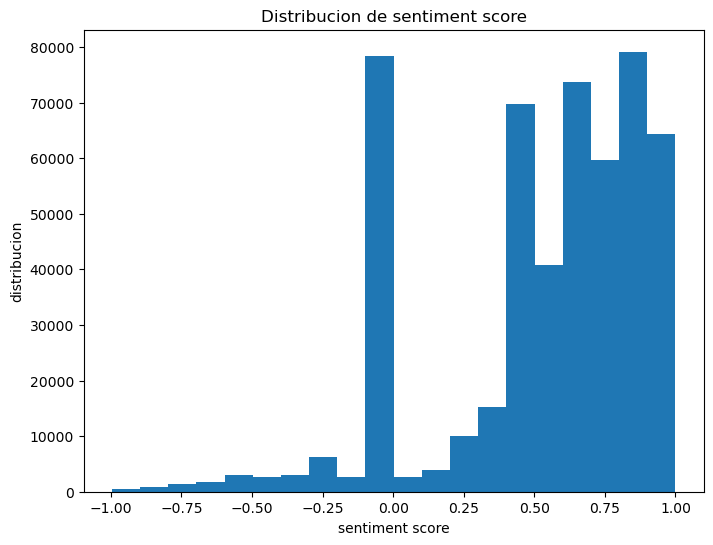

In [14]:
plt.figure(figsize=(8, 6))
df2['sentiment_score'].plot(kind='hist', bins=20)
plt.xlabel('sentiment score')
plt.ylabel('distribucion')
plt.title('Distribucion de sentiment score')
plt.show()

Podemos observar que el puntaje de sentimientos es muy similar al puntaje de rating. Son cursos de mucha calidad.

Pasamos al DF de EDX

In [15]:
df3.head(3)

,title,n_enrolled,institution,Level,subject,language,subtitles,price,course_url,course_effort_promedio,course_length_semana
0,How to Learn Online,124980,edX,Introductory,Education & Teacher Training,English,English,49,https://www.edx.org/course/how-to-learn-online,2,2
1,Programming for Everybody (Getting Started wit...,293864,The University of Michigan,Introductory,Computer Science,English,English,49,https://www.edx.org/course/programming-for-eve...,3,7
2,CS50's Introduction to Computer Science,2442271,Harvard University,Introductory,Computer Science,English,English,90,https://www.edx.org/course/cs50s-introduction-...,12,12


Creamos unos graficos de barras para la distribucion de niveles por curso y para la cantidad de inscriptos por nivel de curso.

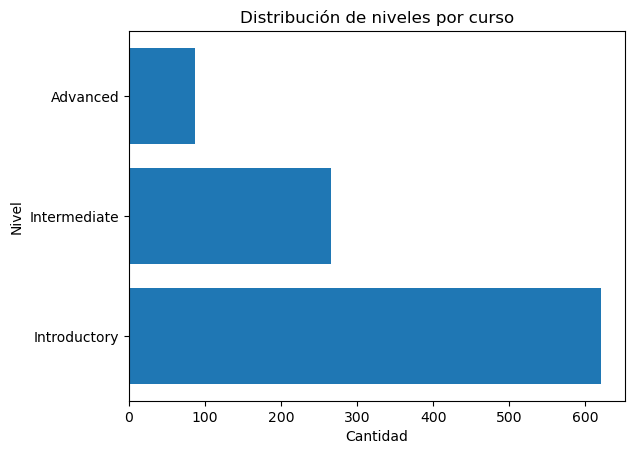

In [16]:
level_counts = df3['Level'].value_counts()

plt.barh(level_counts.index, level_counts.values)
plt.xlabel('Cantidad')
plt.ylabel('Nivel')
plt.title('Distribución de niveles por curso')
plt.show()

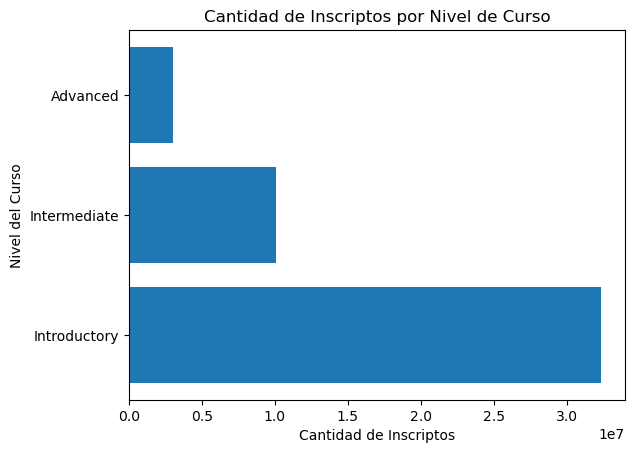

In [17]:
grouped_data = df3.groupby('Level')['n_enrolled'].sum().reset_index()
grouped_data = grouped_data.sort_values('n_enrolled', ascending=False)
plt.barh(grouped_data['Level'], grouped_data['n_enrolled'])
plt.xlabel('Cantidad de Inscriptos')
plt.ylabel('Nivel del Curso')
plt.title('Cantidad de Inscriptos por Nivel de Curso')
plt.show()

Podemos concluir que mientras mayor sea la complejidad del curso menos de estos se imparten y menos alumnos se inscriben.

Generamos un wordcloud y graficamos las palabras mas repetidas.

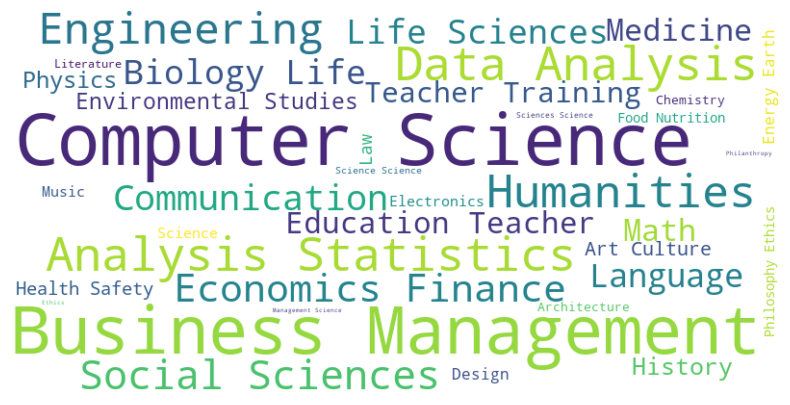

In [52]:
texto = ' '.join(df3['subject'])
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [72]:
word_frequencies = wordcloud.words_
df_word_frequencies = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['frequency'])
df_word_frequencies = df_word_frequencies.sort_values(by='frequency', ascending=False)
top_10_2 = df_word_frequencies.head(10)

In [73]:
top_10_2.reset_index(inplace=True)

In [97]:
top_10_2.head(5)

,categoria2,frecuencia2
0,Computer Science,100
1,Business Management,99
2,Data Analysis,43
3,Analysis Statistics,43
4,Humanities,39


In [77]:
top_10_2.rename(columns={top_10_2.columns[0]: 'categoria2', top_10_2.columns[1]: 'frecuencia2'}, inplace=True)

In [96]:
top_10_2['frecuencia2'] = top_10_2['frecuencia2'].round(2)
top_10_2['frecuencia2'] = top_10_2['frecuencia2'] * 100
top_10_2['frecuencia2'] = top_10_2['frecuencia2'].astype(int)

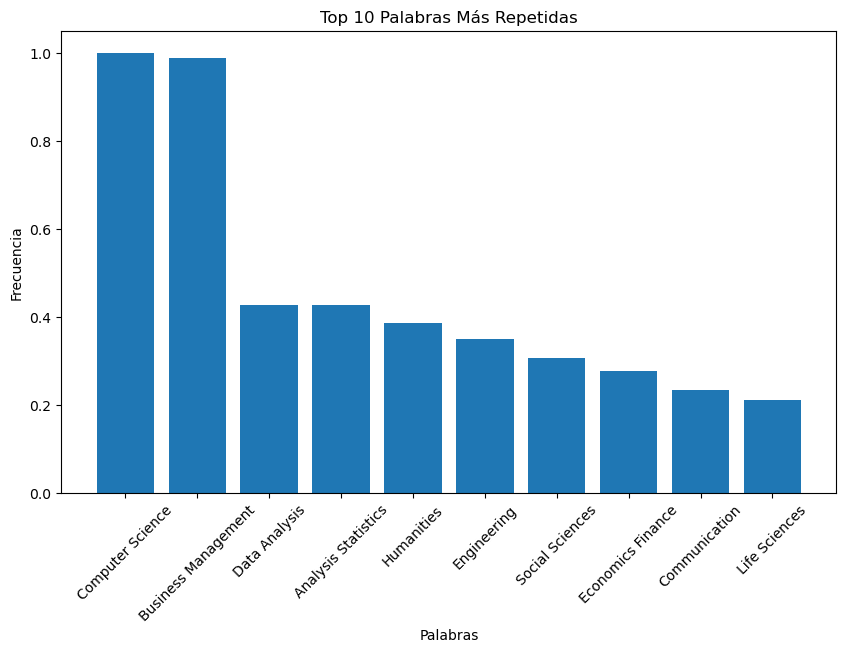

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_2.index, top_10_2['frequency'])
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Top 10 Palabras Más Repetidas')
plt.xticks(rotation=45)
plt.show()

Podemos observar que la programacion y los negocios son el tipo de cursos mas ofertados seguido por data analysis y otros cursos de materias mas tradicionales como ingenierica, humanidades, economia entre otras.

Graficamos la distribucion del lenguaje por curso y la distribucion de los subtitulos.

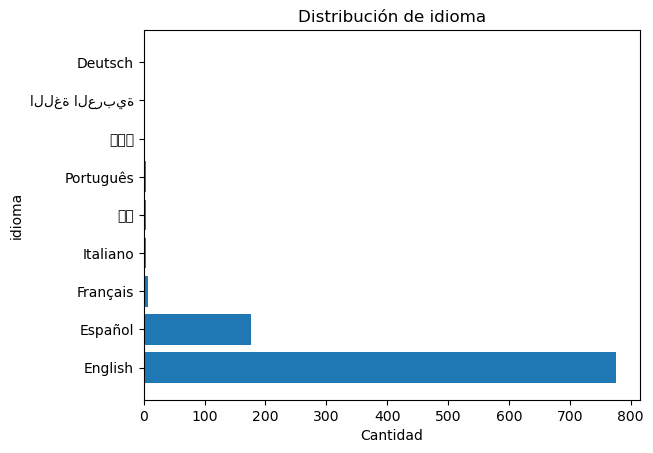

In [21]:
level_counts = df3['language'].value_counts()

plt.barh(level_counts.index, level_counts.values)
plt.xlabel('Cantidad')
plt.ylabel('idioma')
plt.title('Distribución de idioma')
plt.show()

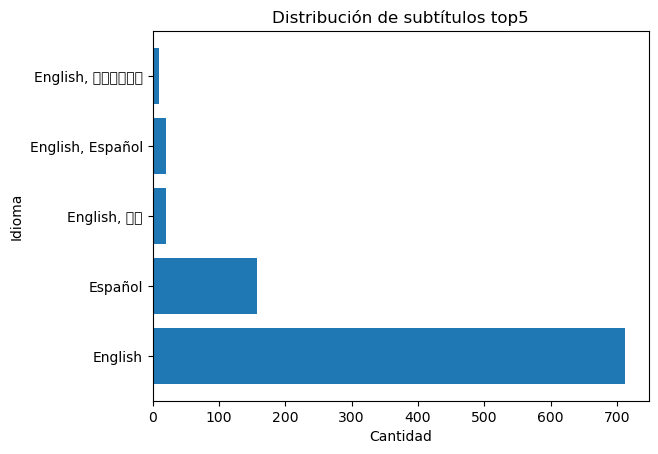

In [22]:
level_counts = df3['subtitles'].value_counts().head(5)

plt.barh(level_counts.index, level_counts.values)
plt.xlabel('Cantidad')
plt.ylabel('Idioma')
plt.title('Distribución de subtítulos top5')
plt.show()

Observamos que la gran moyoria de cursos estan en ingles seguido por el español y en mucha menor escala demas idiomas.

Pasamos con las variables numericas

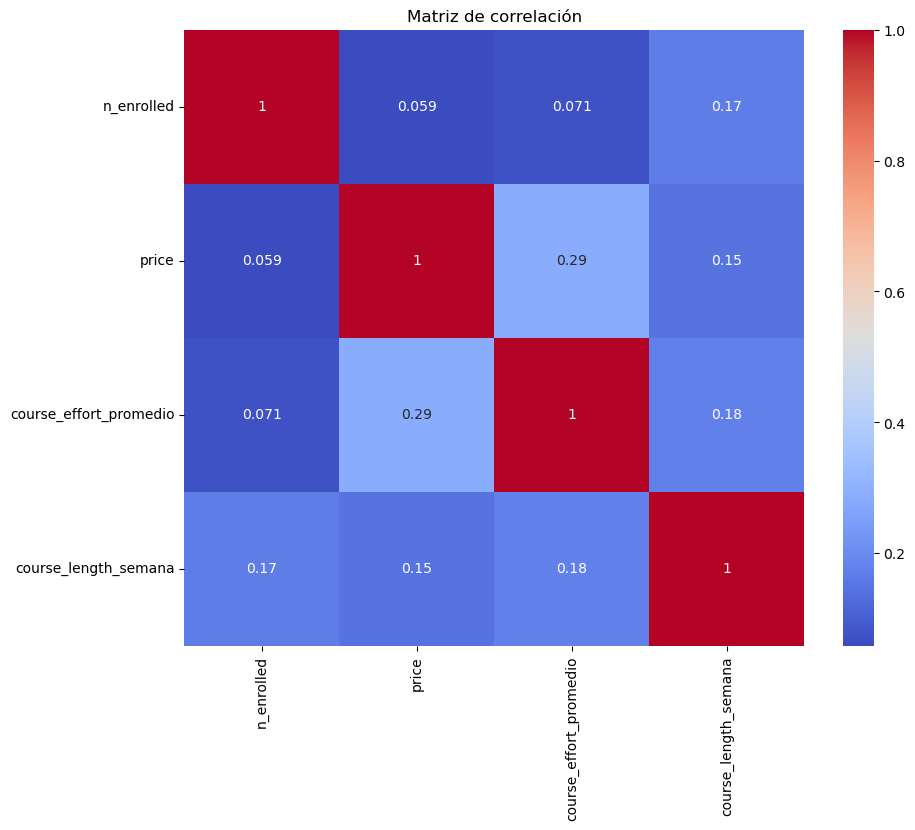

In [23]:
correlation_matrix = df3.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

No observamos ninguna correlacion importante entre variables.

Graficamos la distribucion de precios y la distribucion de la duracion de los cursos.

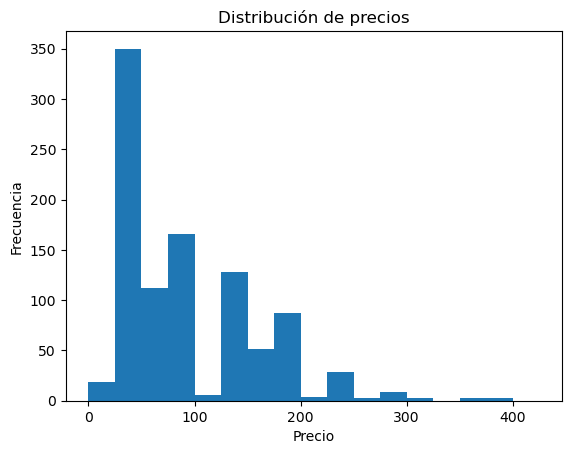

In [24]:
plt.hist(df3['price'], bins=range(0, 450, 25))
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios')
plt.show()

In [25]:
df3.head(2)

,title,n_enrolled,institution,Level,subject,language,subtitles,price,course_url,course_effort_promedio,course_length_semana
0,How to Learn Online,124980,edX,Introductory,Education & Teacher Training,English,English,49,https://www.edx.org/course/how-to-learn-online,2,2
1,Programming for Everybody (Getting Started wit...,293864,The University of Michigan,Introductory,Computer Science,English,English,49,https://www.edx.org/course/programming-for-eve...,3,7


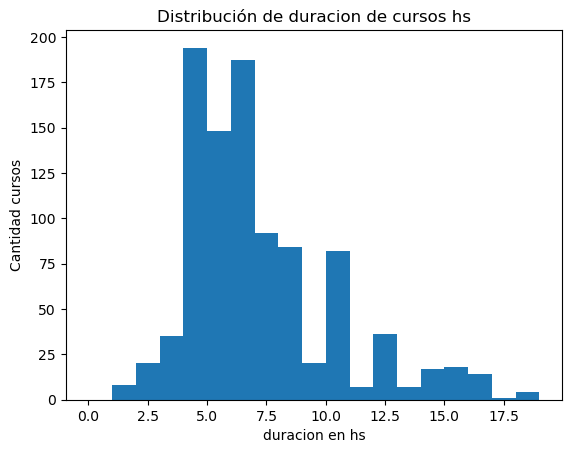

In [26]:
plt.hist(df3['course_length_semana'], bins=range(0,20, 1))

plt.xlabel('duracion en hs')
plt.ylabel('Cantidad cursos')
plt.title('Distribución de duracion de cursos hs')
plt.show()

Podemos observar que la mayoria de cursos ronda entre los 0 y 100 dolares, algunos llegando a 400.
Tambien podemos ver que la mayoria de cursos dura entre 4 y 7 horas.

Graficamos la duracion promedio del curso por nivel y el precio promedio por nivel

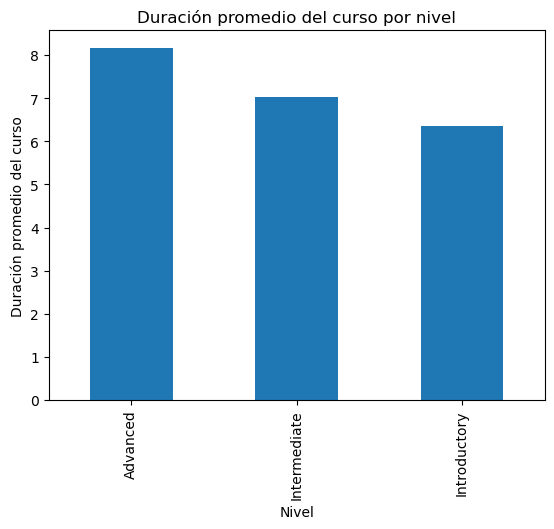

In [27]:
course_length_avg = df3.groupby('Level')['course_length_semana'].mean()
course_length_avg.plot(kind='bar')

plt.xlabel('Nivel')
plt.ylabel('Duración promedio del curso')
plt.title('Duración promedio del curso por nivel')
plt.show()

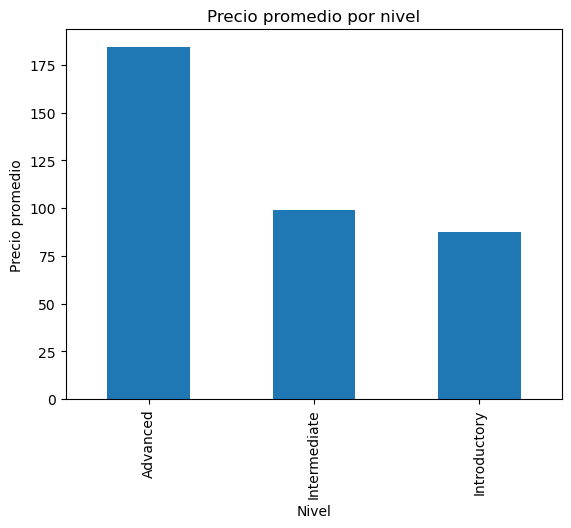

In [28]:
price_avg = df3.groupby('Level')['price'].mean()
price_avg.plot(kind='bar')

plt.xlabel('Nivel')
plt.ylabel('Precio promedio')
plt.title('Precio promedio por nivel')
plt.show()

Observamos que mientras mayor complejidad tenga el curso se incrementa minimamente la cantidad de horas de duracion del curso pero con respecto al precio los cursos avanzamos son casi el doble de caros que los intermedios e introductorios.

Pasamos al DF de Udemy

In [29]:
df4.head(3)

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_date
0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,Business Finance,2017-01-18
1,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,Business Finance,2017-03-09
2,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016-12-19


Creamos un grafico para ver la distribucion de niveles por curso.

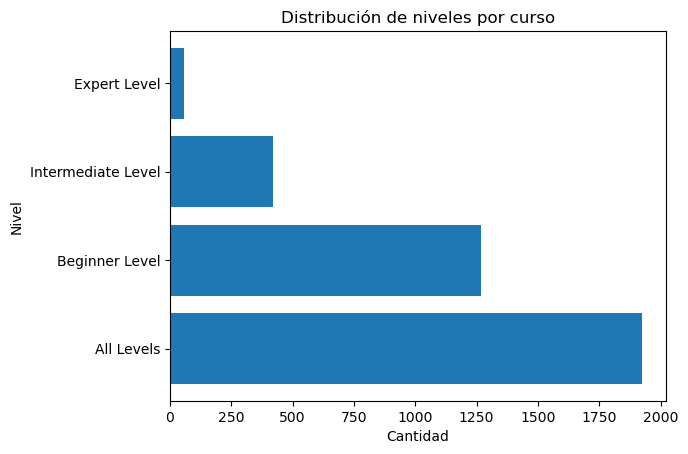

In [30]:
level_counts = df4['level'].value_counts()

plt.barh(level_counts.index, level_counts.values)
plt.xlabel('Cantidad')
plt.ylabel('Nivel')
plt.title('Distribución de niveles por curso')
plt.show()

podemos observar la categoria all levels como la que mas cursos tiene, sin embargo, esta categoria podria contarse como begginer.

Creamos otro grafico para la distribucion de materia o categoria de curso.

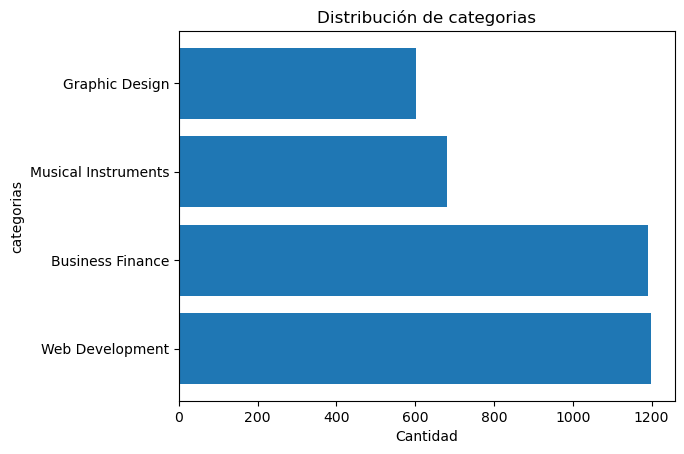

In [31]:
level_counts = df4['subject'].value_counts()

plt.barh(level_counts.index, level_counts.values)
plt.xlabel('Cantidad')
plt.ylabel('categorias')
plt.title('Distribución de categorias')
plt.show()

Como el los anteriores DF observamos que predominan los cursos de programacion y negocios, tambien observamos en esta plataforma las categorias de musica y diseño grafico que son un porcentaje importante.

Observamos la distribucion de los precios y el precio promedio por nivel.

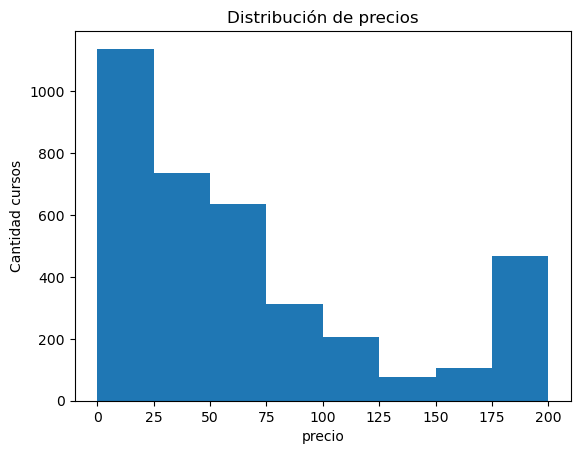

In [32]:
plt.hist(df4['price'], bins=range(0,225, 25))
plt.xlabel('precio')
plt.ylabel('Cantidad cursos')
plt.title('Distribución de precios')
plt.show()

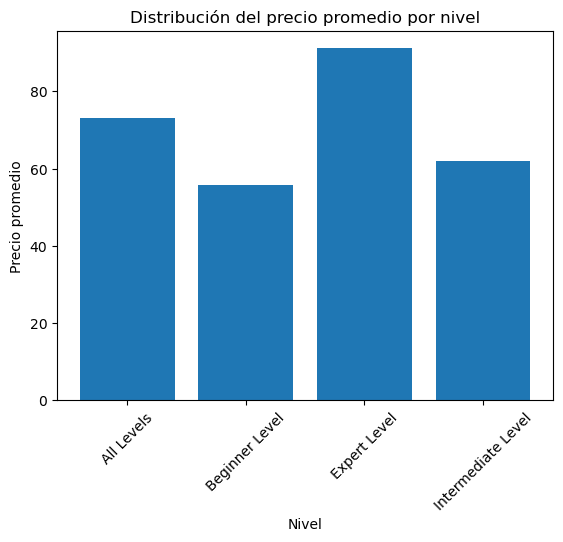

In [33]:
price_mean_by_level = df4.groupby('level')['price'].mean()

plt.bar(price_mean_by_level.index, price_mean_by_level.values)
plt.xlabel('Nivel')
plt.ylabel('Precio promedio')
plt.title('Distribución del precio promedio por nivel')
plt.xticks(rotation=45)
plt.show()

Observamos que gran parte de los cursos cuestan entre 0-25 y que la cantidad de cursos  va bajando a medida que aumenta el precio pero se observa una cantidad considerable de cursos que estan entre los 175-200.

Cremos un grafico para ver los suscriptores por nivel

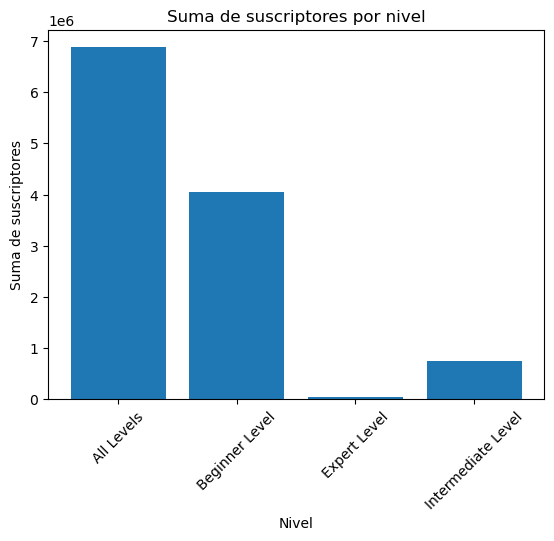

In [34]:
sum_subscribers_by_level = df4.groupby('level')['num_subscribers'].sum()

plt.bar(sum_subscribers_by_level.index, sum_subscribers_by_level.values)
plt.xlabel('Nivel')
plt.ylabel('Suma de suscriptores')
plt.title('Suma de suscriptores por nivel')
plt.xticks(rotation=45)
plt.show()

Podemos observar que la cantidad de suscriptores de nivel experto e intermedio es muy baja en comparacion con las otras categorias.

Obsevamos la distribucion de horas y las horas promedio por nivel.

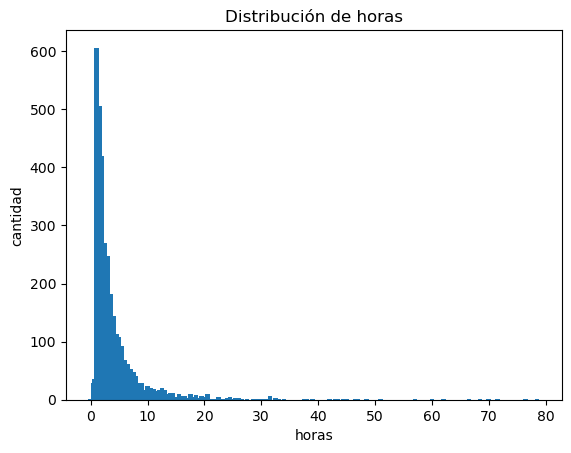

In [35]:
level_counts = df4['content_duration'].value_counts()

plt.bar(level_counts.index, level_counts.values)
plt.xlabel('horas')
plt.ylabel('cantidad')
plt.title('Distribución de horas')
plt.show()

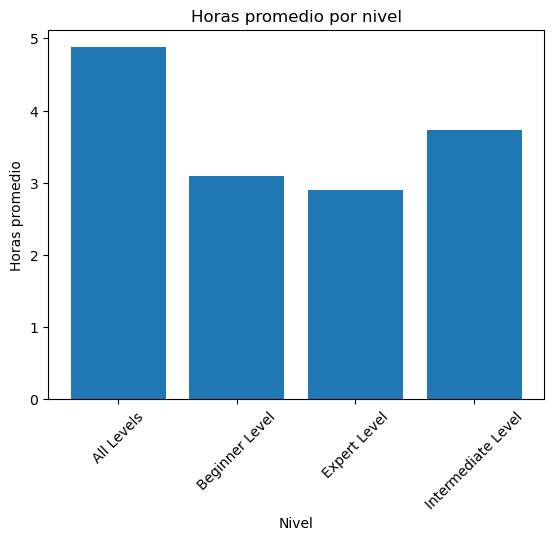

In [36]:
avg_horas = df4.groupby('level')['content_duration'].mean()

plt.bar(avg_horas.index, avg_horas.values)
plt.xlabel('Nivel')
plt.ylabel('Horas promedio')
plt.title('Horas promedio por nivel')
plt.xticks(rotation=45)
plt.show()

Podemos observar que la gran mayoria de curso tienen una duracion en torno a las 4hs y que en las horas promedio por nivel los cursos para expertos son mas cortos que cualquiero otra categoria.

In [37]:
df1.to_csv('Coursera_courses3.csv', index=False)
df2.to_csv('Coursera_reviews3.csv', index=False)
df3.to_csv('edx_courses3.csv', index=False)
df4.to_csv('udemy_courses3.csv', index=False)

In [95]:
top_10_1.to_csv('top_10_1.csv', index=False)

In [98]:
top_10_2.to_csv('top_10_2.csv', index=False)